# 안녕하세요^^ 
## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "구별 업종 등록 데이터" 를 확인해 보도록 하겠습니다

## 기본전제
* 처음에 제공되는 기본/추가 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* business_type.csv

[데이터 소개]
* 서울 시 구별 등록 업종 상위 10개 데이터
    * 택시운송업
    * 한식일반음식점업
    * 용달 화물자동차 운송업
    * 부동산 중개 및 대리업
    * 두발미용업
    * 커피전문점
    * 남녀용 겉옷 및 셔츠 도매업
    * 기타주점업
    * 일반 교과 학원
    * 한식 육류요리 전문점

[변수 소개]
* 다수 업종 상위 1~10

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

## 기본전제
* 처음에 제공되는 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* 1.4 business_type.csv

[데이터 소개]
* 서울시 업종 등록 데이터

#### [실습문제1] 데이터 로딩
* '1.4 business_type.csv'파일을 'seoul_business' 변수에 저장하고 그 데이터를 확인하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요

In [72]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import pandas as pd
seoul_business = pd.read_csv("1.4 business_type.csv", sep = ",", encoding = "UTF-8", header = 1) #0번째 인덱스(행)가 header == 1

In [64]:
pd.set_option("display.max_columns", None)

In [3]:
# 데이터 프레임의 Shape을 확인합니다.
seoul_business.shape

(450, 22)

---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'seoul_moving' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   자치구                450 non-null    object
 1   동                  450 non-null    object
 2   택시운송업              450 non-null    object
 3   택시운송업.1            450 non-null    object
 4   한식 일반 음식점업         450 non-null    object
 5   한식 일반 음식점업.1       450 non-null    object
 6   용달 화물자동차 운송업       450 non-null    object
 7   용달 화물자동차 운송업.1     450 non-null    object
 8   부동산 중개 및 대리업       450 non-null    object
 9   부동산 중개 및 대리업.1     450 non-null    object
 10  두발미용업              450 non-null    object
 11  두발미용업.1            450 non-null    object
 12  커피전문점              450 non-null    object
 13  커피전문점.1            450 non-null    object
 14  남녀용 겉옷 및 셔츠 도매업    450 non-null    object
 15  남녀용 겉옷 및 셔츠 도매업.1  450 non-null    object
 16  기타주점업              450 non-null    object
 1

In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_business.describe()

,자치구,동,택시운송업,택시운송업.1,한식 일반 음식점업,한식 일반 음식점업.1,용달 화물자동차 운송업,용달 화물자동차 운송업.1,부동산 중개 및 대리업,부동산 중개 및 대리업.1,두발미용업,두발미용업.1,커피전문점,커피전문점.1,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업.1,기타주점업,기타주점업.1,일반 교과 학원,일반 교과 학원.1,한식 육류요리 전문점,한식 육류요리 전문점.1
count,450,450,450,450,450,450,450,450,450,450,450,450,450,450,450,450,450,450,450,450,450,450
unique,27,425,225,279,175,304,176,179,141,204,120,179,130,238,68,146,126,188,112,221,106,229
top,송파구,소계,11,11,24,85,27,56,40,64,46,47,13,16,1,-,18,20,4,-,17,45
freq,28,25,7,7,11,6,8,9,11,9,12,10,18,8,82,82,14,10,15,10,16,9


#### [실습문제3] 데이터 확인 및 처리

* 데이터를 보았을때, 어느 데이터를 가져와야 할지 생각 해 봅시다.

In [6]:
seoul_business.head()

,자치구,동,택시운송업,택시운송업.1,한식 일반 음식점업,한식 일반 음식점업.1,용달 화물자동차 운송업,용달 화물자동차 운송업.1,부동산 중개 및 대리업,부동산 중개 및 대리업.1,두발미용업,두발미용업.1,커피전문점,커피전문점.1,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업.1,기타주점업,기타주점업.1,일반 교과 학원,일반 교과 학원.1,한식 육류요리 전문점,한식 육류요리 전문점.1
0,자치구,동,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수
1,합계,합계,"47,176","76,701","29,225","100,183","28,494","29,356","24,013","42,636","18,080","36,214","16,255","57,322","13,388","51,116","13,339","31,371","11,911","50,773","11,109","44,653"
2,종로구,소계,215,215,"1,548","5,912",618,646,549,889,261,480,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"
3,종로구,사직동,7,7,230,982,12,12,57,96,28,66,124,525,2,18,74,177,9,34,45,220
4,종로구,삼청동,5,5,42,145,4,4,9,10,-,-,66,243,2,3,3,8,-,-,7,33


In [7]:
seoul_business.tail()

,자치구,동,택시운송업,택시운송업.1,한식 일반 음식점업,한식 일반 음식점업.1,용달 화물자동차 운송업,용달 화물자동차 운송업.1,부동산 중개 및 대리업,부동산 중개 및 대리업.1,두발미용업,두발미용업.1,커피전문점,커피전문점.1,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업.1,기타주점업,기타주점업.1,일반 교과 학원,일반 교과 학원.1,한식 육류요리 전문점,한식 육류요리 전문점.1
445,강동구,성내3동,120,120,135,390,73,73,104,163,83,113,54,133,10,86,57,103,66,199,44,164
446,강동구,둔촌2동,117,436,63,249,89,89,61,108,62,75,34,85,10,788,21,39,35,90,24,101
447,강동구,암사1동,209,372,71,195,153,153,67,107,82,114,29,59,3,6,47,98,31,67,34,98
448,강동구,천호2동,157,187,152,509,144,151,97,188,83,168,63,212,4,17,95,268,24,42,69,245
449,강동구,길동,"1,441","1,557",152,436,217,225,146,237,121,193,71,228,6,126,122,294,39,136,70,224


In [73]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_business = seoul_business.iloc[:,[0, 1, 5, 13, 17, 21]]
seoul_business.head()

,자치구,동,한식 일반 음식점업.1,커피전문점.1,기타주점업.1,한식 육류요리 전문점.1
0,자치구,동,종사자수,종사자수,종사자수,종사자수
1,합계,합계,"100,183","57,322","31,371","44,653"
2,종로구,소계,"5,912","3,613","1,413","1,982"
3,종로구,사직동,982,525,177,220
4,종로구,삼청동,145,243,8,33


In [74]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_business = seoul_business[seoul_business["동"] == "소계"].reset_index(drop = True)

In [75]:
# 해당 데이터프레임을 'df_seoul_business.csv' 파일로 저장하세요.
# seoul_business = seoul_business.drop("동", axis = 1)
seoul_business.to_csv("df_seoul_business.csv", index = False)

---

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst

In [78]:
temp = pd.read_csv("df_seoul_business.csv", sep = ",", encoding = "UTF-8", thousands = ",")
temp

,자치구,동,한식 일반 음식점업.1,커피전문점.1,기타주점업.1,한식 육류요리 전문점.1
0,종로구,소계,5912,3613,1413,1982
1,중구,소계,6414,3542,982,2121
2,용산구,소계,2987,2076,1332,1184
3,성동구,소계,2785,1859,621,1545
4,광진구,소계,2861,1887,1577,1678
5,동대문구,소계,3566,1472,1082,1509
6,중랑구,소계,2479,1037,1000,1504
7,성북구,소계,2822,1384,1030,1334
8,강북구,소계,2663,1095,1275,1176
9,도봉구,소계,2009,837,477,943


#### [실습문제4] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

In [79]:
temp = temp.sort_values("자치구")

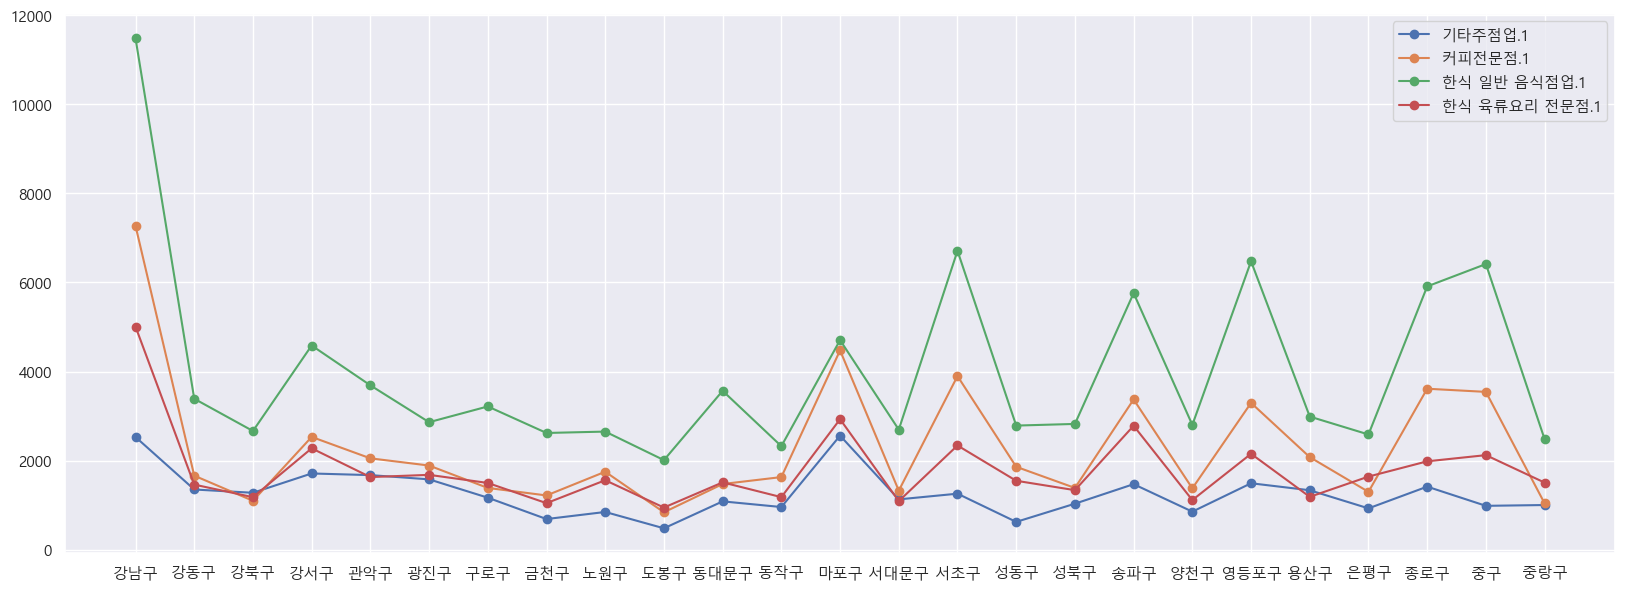

In [80]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize = (20, 7))
plt.plot("자치구", "기타주점업.1", "-o", data = temp)
plt.plot("자치구", "커피전문점.1", "-o", data = temp)
plt.plot("자치구", "한식 일반 음식점업.1", "-o", data = temp)
plt.plot("자치구", "한식 육류요리 전문점.1", "-o", data = temp)
plt.legend()
plt.show()

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

---